Fall 2024
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

DSAI 305,
Interpretability & Explainability in AI

University of Science and Technology, Zewail City

 **Salma Wael 202201761**

<br>

<h1 align="center"></h3>
<h1 align="center">Phase 3</h3>
<h1 align="center">CNN architecture</h3>

---

# 1- Preprocessing - EDA
---------------------------------------------

# 1. Reading Data

In [1]:
import os
from google.colab import files

# Upload kaggle.json file
files.upload()

# Set up Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!mv "/content/kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ninadaithal/imagesoasis
!unzip imagesoasis.zip -d "/content/oasis_dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: /content/oasis_dataset/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: /content/oasis_dataset/Data/Very mil

In [4]:
data_dir = "/content/oasis_dataset/Data"

In [5]:
import os

# Recursively list files in the Data folder
for root, dirs, files in os.walk("/content/oasis_dataset/Data"):
    if files:  # Only print directories with files
        print(f" Directory: {root}")
        print(f" Files: {files[:5]}")  # Display first 5 files for each directory
        print()

 Directory: /content/oasis_dataset/Data/Moderate Dementia
 Files: ['OAS1_0351_MR1_mpr-4_117.jpg', 'OAS1_0308_MR1_mpr-4_145.jpg', 'OAS1_0351_MR1_mpr-3_118.jpg', 'OAS1_0351_MR1_mpr-4_143.jpg', 'OAS1_0351_MR1_mpr-3_152.jpg']

 Directory: /content/oasis_dataset/Data/Very mild Dementia
 Files: ['OAS1_0380_MR1_mpr-2_105.jpg', 'OAS1_0015_MR1_mpr-2_102.jpg', 'OAS1_0066_MR1_mpr-2_106.jpg', 'OAS1_0243_MR1_mpr-3_137.jpg', 'OAS1_0016_MR1_mpr-2_120.jpg']

 Directory: /content/oasis_dataset/Data/Mild Dementia
 Files: ['OAS1_0031_MR1_mpr-3_130.jpg', 'OAS1_0373_MR1_mpr-2_134.jpg', 'OAS1_0052_MR1_mpr-3_118.jpg', 'OAS1_0122_MR1_mpr-3_123.jpg', 'OAS1_0134_MR1_mpr-4_116.jpg']

 Directory: /content/oasis_dataset/Data/Non Demented
 Files: ['OAS1_0227_MR1_mpr-1_118.jpg', 'OAS1_0117_MR2_mpr-3_144.jpg', 'OAS1_0241_MR1_mpr-2_156.jpg', 'OAS1_0038_MR1_mpr-3_123.jpg', 'OAS1_0253_MR1_mpr-4_104.jpg']



In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128  # Adjust image size if needed
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=40,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2,# Random vertical shifts
    shear_range=0.2,       # Shear transformations
    zoom_range=0.2,        # Zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'    # Fill pixels after transformations
)

# Training data generator
train_gen = datagen.flow_from_directory(
    '/content/oasis_dataset/Data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/oasis_dataset/Data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 69151 images belonging to 4 classes.
Found 17286 images belonging to 4 classes.


## 2- EDA and Preprocessing

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from collections import Counter
from tqdm import tqdm

In [8]:
#Classes
class_names = os.listdir(data_dir)
print("Classes found:", class_names)

Classes found: ['Moderate Dementia', 'Very mild Dementia', 'Mild Dementia', 'Non Demented']


In [9]:
# Number of images per each class
from PIL import Image
import os
import numpy as np

image_shapes = []
total_images = 0

for cls in class_names:
    cls_path = os.path.join(data_dir, cls)
    images = os.listdir(cls_path)
    total_images += len(images)

    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            image_shapes.append(np.array(img).shape)
        except:
            continue

    print(f"{cls}: {len(images)} images")
# Convert to array for easy stats
image_shapes = np.array(image_shapes)

print(f"Total Images: {total_images}")

Moderate Dementia: 488 images
Very mild Dementia: 13725 images
Mild Dementia: 5002 images
Non Demented: 67222 images
Total Images: 86437


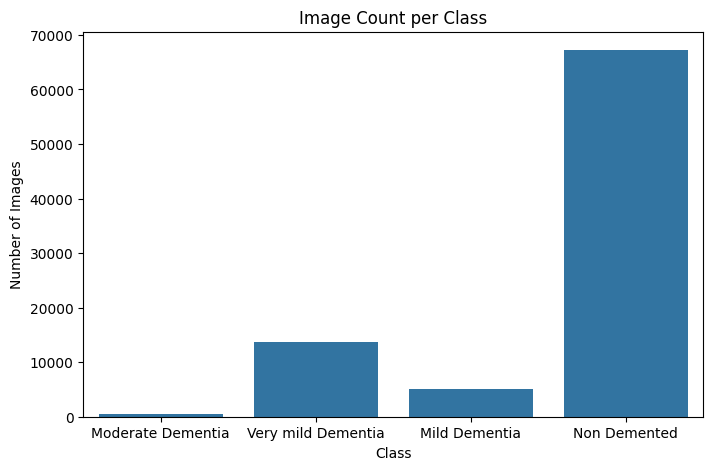

In [10]:
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [11]:
#Train Test Split
import shutil

train_dir=os.path.join(data_dir, 'train')
test_dir=os.path.join(data_dir, 'test')

for cls in class_names:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

def split_and_copy(source_path, class_name, train_dest, test_dest, test_ratio=0.2):
    all_files = os.listdir(source_path)
    np.random.shuffle(all_files)

    train_files, test_files = np.split(np.array(all_files), [int(len(all_files) * (1 - test_ratio))])

    for file in train_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(train_dest, class_name, file))
    for file in test_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(test_dest, class_name, file))

for cls in class_names:
    split_and_copy(os.path.join(data_dir, cls), cls, train_dir, test_dir)

print("Train-test split completed!")

Train-test split completed!


In [12]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    shuffle=True
)

Found 69148 images belonging to 4 classes.
Found 17289 images belonging to 4 classes.


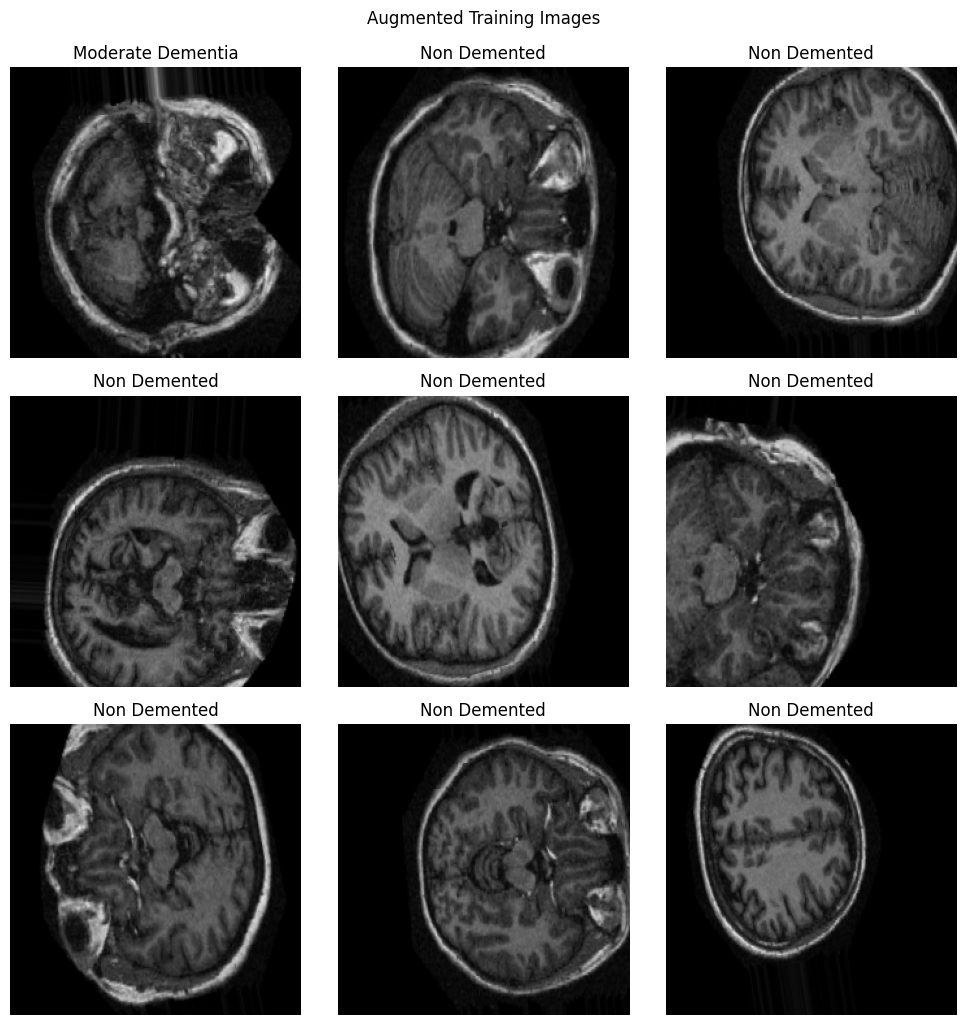

In [13]:
# Visualize Augumented data
images, labels = next(train_generator)
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    class_name = idx_to_class[np.argmax(labels[i])]
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Augmented Training Images", y=1.02)
plt.show()

<ipython-input-14-8824df654495>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette="pastel")


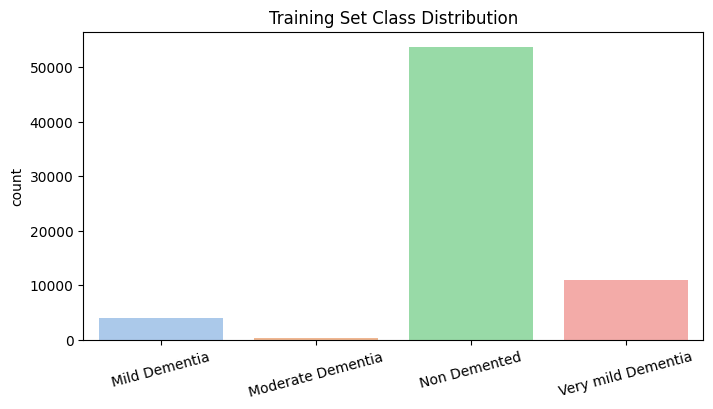

<ipython-input-14-8824df654495>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_labels, palette="pastel")


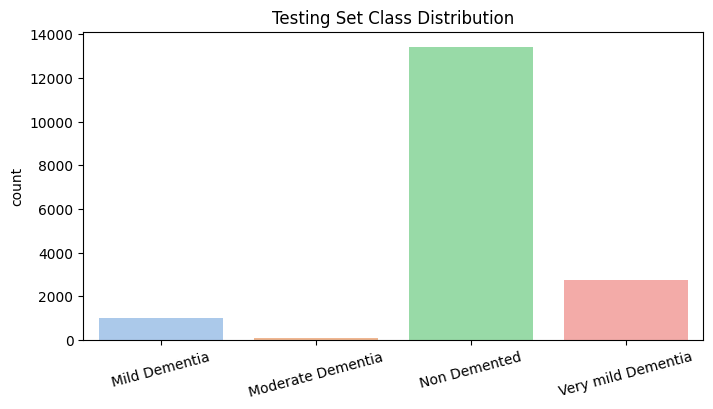

In [14]:
# Class Distribution stats
import pandas as pd

train_labels = [idx_to_class[c] for c in train_generator.classes]
test_labels = [idx_to_class[c] for c in test_generator.classes]

plt.figure(figsize=(8, 4))
sns.countplot(x=train_labels, palette="pastel")
plt.title("Training Set Class Distribution")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x=test_labels, palette="pastel")
plt.title("Testing Set Class Distribution")
plt.xticks(rotation=15)
plt.show()

In [15]:
# Images height and width statistics
heights = image_shapes[:, 0]
widths = image_shapes[:, 1]
channels = image_shapes[:, 2]

print(f"Image Height - Mean: {np.mean(heights):.1f}, Min: {np.min(heights)}, Max: {np.max(heights)}")
print(f"Image Width  - Mean: {np.mean(widths):.1f}, Min: {np.min(widths)}, Max: {np.max(widths)}")
print(f"Channels: {np.unique(channels)}")

Image Height - Mean: 248.0, Min: 248, Max: 248
Image Width  - Mean: 496.0, Min: 496, Max: 496
Channels: [3]


# <span style="color: red;">2- Model Building : CNN architecture </span>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Conv1
    MaxPooling2D(pool_size=(2, 2)),  # MaxP1

    Conv2D(64, (3, 3), activation='relu'),  # Conv2
    MaxPooling2D(pool_size=(2, 2)),  # MaxP2

    Conv2D(128, (3, 3), activation='relu'),  # Conv3
    MaxPooling2D(pool_size=(2, 2)),  # MaxP3

    Flatten(),
    Dense(128, activation='relu'),  # FC1
    Dropout(0.5),
    Dense(4, activation='softmax')  # FC2 - 4 classes: AD, EMCI, LMCI, NC
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 893s 413ms/step - accuracy: 0.7780 - loss: 0.6469 - val_accuracy: 0.7778 - val_loss: 0.5131
Epoch 2/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 885s 410ms/step - accuracy: 0.7778 - loss: 0.5270 - val_accuracy: 0.7785 - val_loss: 0.4830
Epoch 3/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 892s 413ms/step - accuracy: 0.7832 - loss: 0.4981 - val_accuracy: 0.7871 - val_loss: 0.5027
Epoch 4/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 887s 410ms/step - accuracy: 0.7823 - loss: 0.4899 - val_accuracy: 0.7911 - val_loss: 0.4658
Epoch 5/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 906s 419ms/step - accuracy: 0.7829 - loss: 0.4828 - val_accuracy: 0.7869 - val_loss: 0.4646
Epoch 6/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 944s 437ms/step - accuracy: 0.7847 - loss: 0.4873 - val_accuracy: 0.7922 - val_loss: 0.4525
Epoch 7/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 887s 411ms/step - accuracy: 0.7851 - loss: 0.4754 - val_accuracy: 0.7866 - val_loss: 0.4494
Epoch 8/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 899s 416ms/step - ac

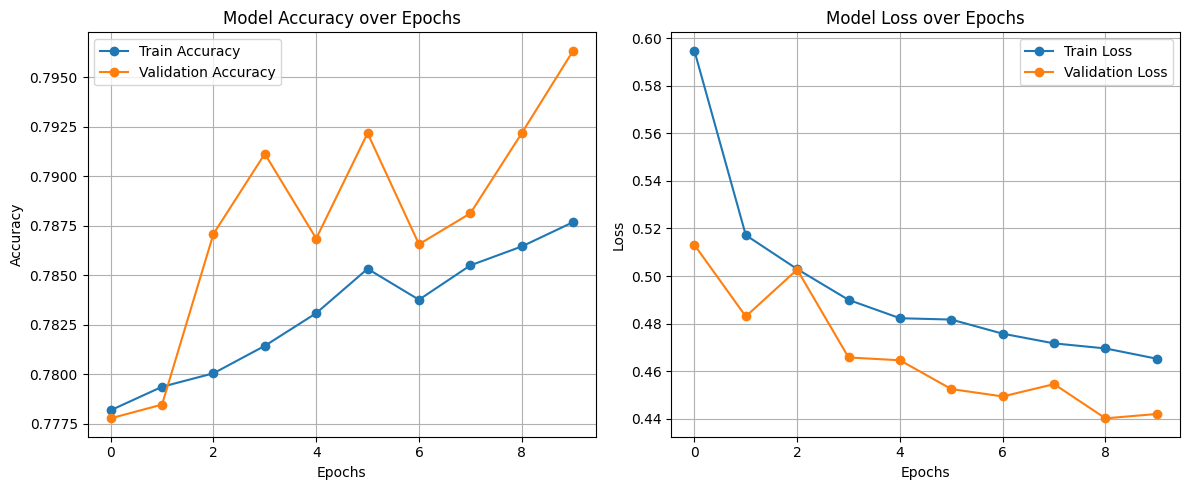

In [20]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

4323/4323 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.7936 - loss: 0.4446

Test Accuracy: 79.63%
Test Loss: 0.4420


4323/4323 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step


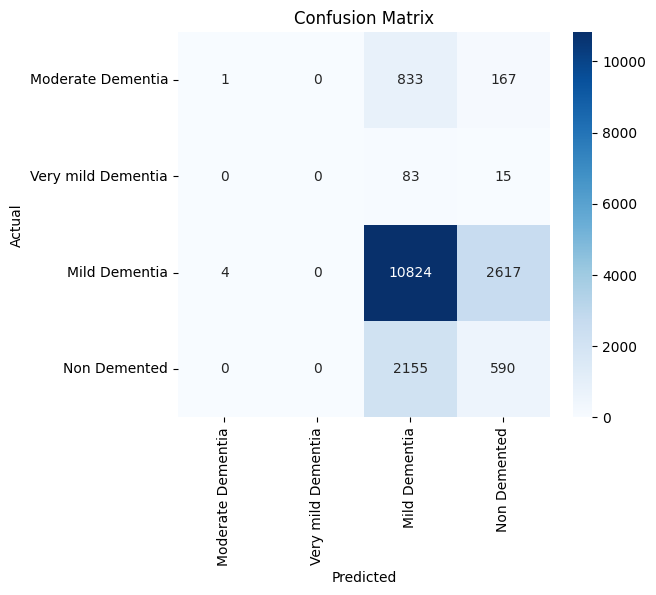


Classification Report:

                    precision    recall  f1-score   support

 Moderate Dementia       0.20      0.00      0.00      1001
Very mild Dementia       0.00      0.00      0.00        98
     Mild Dementia       0.78      0.81      0.79     13445
      Non Demented       0.17      0.21      0.19      2745

          accuracy                           0.66     17289
         macro avg       0.29      0.26      0.25     17289
      weighted avg       0.65      0.66      0.65     17289



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict class probabilities
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

#Explainability Techniques

#lime

In [77]:
!pip install lime

In [101]:
# Create a test model with known architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

test_model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(4, activation='softmax')
])
test_model.compile(optimizer='adam', loss='categorical_crossentropy')


def test_predict_fn(images):
    if len(images.shape) == 3:
        images = np.expand_dims(images, 0)
    return test_model.predict(images)

explanation = explainer.explain_instance(
    sample_image,
    test_predict_fn,
    num_samples=100
)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


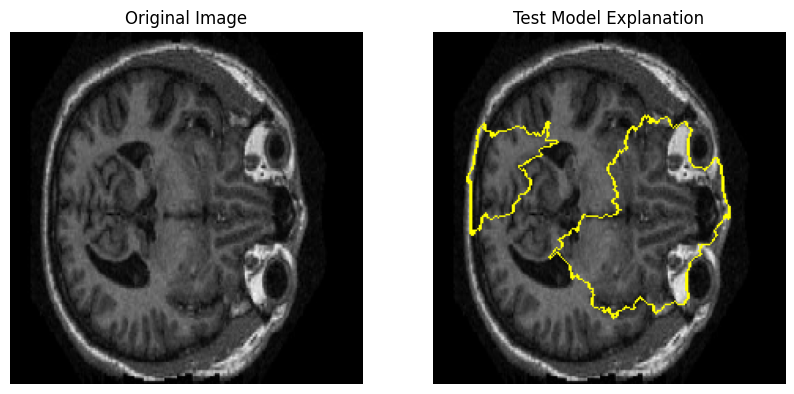

LIME worked with test model!


In [92]:
# Visualize the explanation from the test model
try:
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
    )

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp, mask))
    plt.title('Test Model Explanation')
    plt.axis('off')
    plt.show()

    print("LIME worked with test model!")
except Exception as e:
    print(f"Test model explanation failed: {e}")

In [93]:
# Print both model architectures
print("\nOriginal Model Summary:")
model.summary()

print("\nTest Model Summary:")
test_model.summary()



Original Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,508,430 (127.82 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,954 (85.22 MB)


Test Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 197136)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       788,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,996 (3.01 MB)

 Trainable params: 788,996 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

#grad cam

In [102]:
from tensorflow.keras.layers import Reshape

fixed_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Reshape((-1,)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
fixed_model.compile(optimizer='adam', loss='categorical_crossentropy')

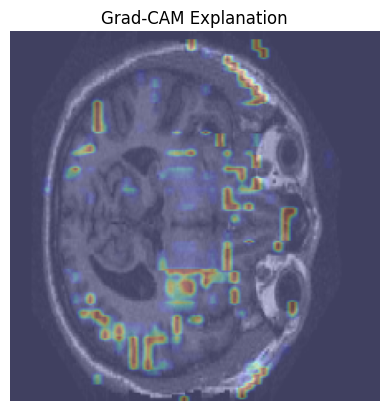

In [99]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

def model_modifier(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear
    return cloned_model

gradcam = Gradcam(model, model_modifier, clone=True)
cam = gradcam(lambda pred: pred[:, true_label],
             sample_image[np.newaxis,...],
             penultimate_layer=-1)

plt.imshow(normalize(cam[0]), cmap='jet', alpha=0.5)
plt.imshow(sample_image, alpha=0.5)
plt.title('Grad-CAM Explanation')
plt.axis('off')
plt.show()

#shap

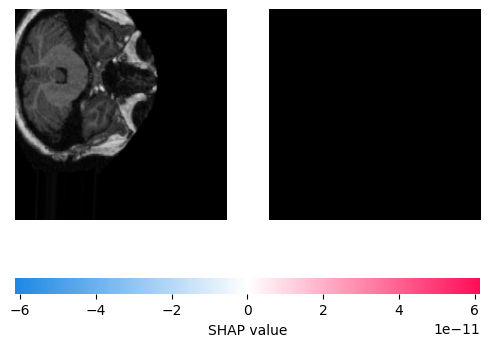

In [30]:
!pip install shap

import shap

# Use a subset of images due to performance
sample_imgs, _ = next(train_generator)

explainer = shap.DeepExplainer(model, sample_imgs[:10])
shap_values = explainer.shap_values(sample_imgs[:1])

# Visualize SHAP values for one sample
shap.image_plot(shap_values, sample_imgs[:1])

#PDP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.inspection import partial_dependence

def image_pdp(model, base_image, feature_range=(0, 224), feature='row', target_class=0, n_samples=50):

    # Create grid of values
    if feature == 'row':
        grid = np.linspace(feature_range[0], feature_range[1], num=n_samples, dtype=int)
        grid = np.clip(grid, 0, base_image.shape[0]-1)
    else:
        grid = np.linspace(feature_range[0], feature_range[1], num=n_samples, dtype=int)
        grid = np.clip(grid, 0, base_image.shape[1]-1)

    pdp_values = []
    for value in tqdm(grid):
        modified_images = []
        for _ in range(10):
            modified = base_image.copy()
            if feature == 'row':
                modified[value, :, :] = np.random.rand(*modified[value, :, :].shape)
            else:
                modified[:, value, :] = np.random.rand(*modified[:, value, :].shape)
            modified_images.append(modified)

        preds = model.predict(np.array(modified_images), verbose=0)
        pdp_values.append(np.mean(preds[:, target_class]))

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(grid, pdp_values, 'b-', linewidth=2)
    plt.title(f'PDP for {feature} pixels (class {idx_to_class[target_class]})')
    plt.xlabel(f'{feature} index')
    plt.ylabel('Prediction probability')
    plt.grid(True)
    plt.show()

    return grid, pdp_values

sample_image = test_images[0]
row_grid, row_pdp = image_pdp(model, sample_image, feature='row', target_class=0)
col_grid, col_pdp = image_pdp(model, sample_image, feature='column', target_class=0)